[Data Set](https://www.kaggle.com/competitions/aptos2019-blindness-detection/data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,te;q=0.8,fr;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14774/875431/compressed/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1696949120&Signature=mczR1bCBxgLtVF%2BxkVdojnf4CZD2h6Ou5%2BwV5s%2FYDIc0ZdRqLUdNuT17LV%2BLBNUYUdNl4SR16powgaAQ%2FuKCsJo7d2g2YU3gnGK1pO1uNLMltJ84dLU9sLopy2G%2Fl4Vn0gvOg1kZ6wl3xxCbt9BPgsn4quexdIkTpj1IIGDJNRd4knG%2FJuyaACkCDCHQLDdYLIMtYR%2Fl8Io2uMr1LS%2FGPaaLmBVAz74SlVCbZTcM3TRRG6a2Ek82sF3lNWA6UDkVM74CMvQhNpBVvb10kBhGWzWsuSh6F9mPmj89RYR6VlRWR7bvtiBXpqMgxTlPpxdZ7HqYzrOrQ8%2BdAdEPWn4ycQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_images.zip" -c -O 'train_images.zip'

--2023-10-07 14:48:15--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14774/875431/compressed/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1696949120&Signature=mczR1bCBxgLtVF%2BxkVdojnf4CZD2h6Ou5%2BwV5s%2FYDIc0ZdRqLUdNuT17LV%2BLBNUYUdNl4SR16powgaAQ%2FuKCsJo7d2g2YU3gnGK1pO1uNLMltJ84dLU9sLopy2G%2Fl4Vn0gvOg1kZ6wl3xxCbt9BPgsn4quexdIkTpj1IIGDJNRd4knG%2FJuyaACkCDCHQLDdYLIMtYR%2Fl8Io2uMr1LS%2FGPaaLmBVAz74SlVCbZTcM3TRRG6a2Ek82sF3lNWA6UDkVM74CMvQhNpBVvb10kBhGWzWsuSh6F9mPmj89RYR6VlRWR7bvtiBXpqMgxTlPpxdZ7HqYzrOrQ8%2BdAdEPWn4ycQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.207, 172.217.214.207, 108.177.111.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8602291542 (8.0G) [application/zip]
Saving to: ‘train_images.zip’

trai

In [ ]:
!mkdir images

In [ ]:
!unzip /content/train_images.zip -d /content/images

Archive:  /content/train_images.zip
  inflating: /content/images/000c1434d8d7.png  
  inflating: /content/images/001639a390f0.png  
  inflating: /content/images/0024cdab0c1e.png  
  inflating: /content/images/002c21358ce6.png  
  inflating: /content/images/005b95c28852.png  
  inflating: /content/images/0083ee8054ee.png  
  inflating: /content/images/0097f532ac9f.png  
  inflating: /content/images/00a8624548a9.png  
  inflating: /content/images/00b74780d31d.png  
  inflating: /content/images/00cb6555d108.png  
  inflating: /content/images/00cc2b75cddd.png  
  inflating: /content/images/00e4ddff966a.png  
  inflating: /content/images/00f6c1be5a33.png  
  inflating: /content/images/0104b032c141.png  
  inflating: /content/images/0124dffecf29.png  
  inflating: /content/images/0125fbd2e791.png  
  inflating: /content/images/012a242ac6ff.png  
  inflating: /content/images/014508ccb9cb.png  
  inflating: /content/images/0151781fe50b.png  
  inflating: /content/images/0161338f53cc.png  
  in

In [ ]:
import pandas as pd
import os
df = pd.read_csv('/content/drive/MyDrive/PROJECTS/Deep Learning/Diabetic Retinopathy/NoteBook/train.csv')
df["filename"] = df["id_code"].map(lambda x:os.path.join("/content/images",x+".png"))
df = df[df['diagnosis'] != 0]
df.head()

,id_code,diagnosis,filename
0,000c1434d8d7,2,/content/images/000c1434d8d7.png
1,001639a390f0,4,/content/images/001639a390f0.png
2,0024cdab0c1e,1,/content/images/0024cdab0c1e.png
5,0083ee8054ee,4,/content/images/0083ee8054ee.png
7,00a8624548a9,2,/content/images/00a8624548a9.png


In [ ]:
df['diagnosis'] = df.apply(lambda row: 0 if row['diagnosis'] == 2 else 1, axis=1)

<Axes: >

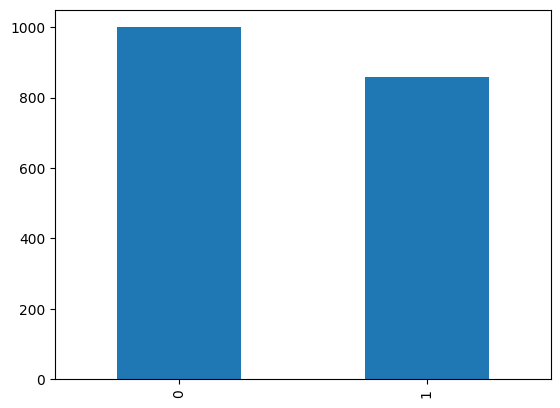

In [ ]:
df['diagnosis'].value_counts(sort=True).plot(kind='bar')

### train and test split

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
label_title = {"1" : "Mild","2" : "Moderate","3" :"Severe","4" : "Proliferative DR"}
class_labels=["Mild","Moderate","Severe","Proliferative DR"]

In [ ]:
from sklearn.model_selection import train_test_split
train_df,val_df = train_test_split(df,random_state=42,shuffle=True,test_size=0.333)
train_df.reset_index(drop=True,inplace=True)
val_df.reset_index(drop=True,inplace=True)

0    677
1    561
Name: diagnosis, dtype: int64


<Axes: >

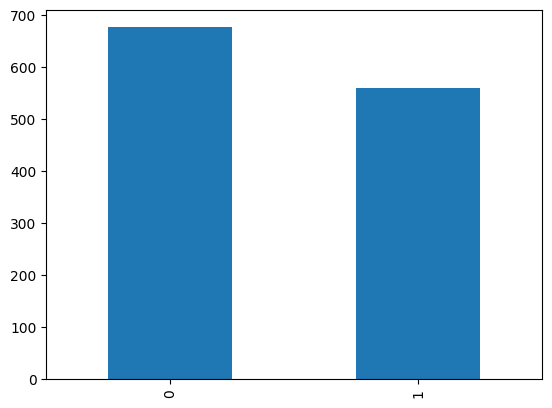

In [ ]:
print(train_df['diagnosis'].value_counts())
train_df['diagnosis'].value_counts().plot.bar()

0    322
1    297
Name: diagnosis, dtype: int64


<Axes: >

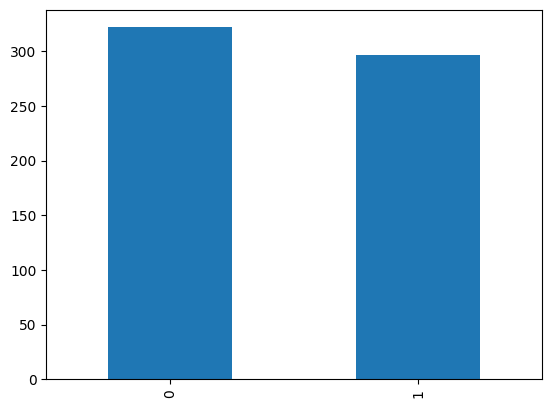

In [ ]:
print(val_df['diagnosis'].value_counts())
val_df['diagnosis'].value_counts().plot.bar()

### Data Pre-processing

In [ ]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
n_images = len(df)
Y = np.zeros((n_images,4))

In [ ]:
import cv2
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

def load_raw_images_df(data_frame,filenamecol,labelcol,img_size,n_classes):
    n_images = len(data_frame)
    X = np.empty((n_images,img_size,img_size,3))
    Y = np.zeros((n_images,n_classes))
    for index,entry in data_frame.iterrows():
        Y[index,entry[labelcol]-1] = 1
        img = cv2.imread(entry[filenamecol])
        X[index,:] = cv2.resize(img, (img_size, img_size))
        X[index,:] = X[index,:] / 255.0
    return X,Y

In [ ]:
X_train,Y_train = load_raw_images_df(df,"filename","diagnosis",256,2)
X_val,Y_val = load_raw_images_df(val_df,"filename","diagnosis",256,2)

In [ ]:
import numpy as np

y = np.argmax(Y_train,axis=1)
classes = np.unique(y)
class_counts = np.bincount(y)
total_samples = np.sum(class_counts)
class_weights = total_samples / (len(classes) * class_counts)
class_weight_dict = dict(zip(classes, class_weights))
print(class_weight_dict)

{0: 1.082167832167832, 1: 0.9294294294294294}


In [ ]:
class MixupGenerator():
    def __init__(self, X_train, y_train, batch_size=32, alpha=0.2, shuffle=True, datagen=None):
        self.X_train = X_train
        self.y_train = y_train
        self.batch_size = batch_size
        self.alpha = alpha
        self.shuffle = shuffle
        self.sample_num = len(X_train)
        self.datagen = datagen

    def __call__(self):
        while True:
            indexes = self.__get_exploration_order()
            itr_num = int(len(indexes) // (self.batch_size * 2))

            for i in range(itr_num):
                batch_ids = indexes[i * self.batch_size * 2:(i + 1) * self.batch_size * 2]
                X, y = self.__data_generation(batch_ids)

                yield X, y

    def __get_exploration_order(self):
        indexes = np.arange(self.sample_num)

        if self.shuffle:
            np.random.shuffle(indexes)

        return indexes

    def __data_generation(self, batch_ids):
        _, h, w, c = self.X_train.shape
        l = np.random.beta(self.alpha, self.alpha, self.batch_size)
        X_l = l.reshape(self.batch_size, 1, 1, 1)
        y_l = l.reshape(self.batch_size, 1)

        X1 = self.X_train[batch_ids[:self.batch_size]]
        X2 = self.X_train[batch_ids[self.batch_size:]]
        X = X1 * X_l + X2 * (1 - X_l)

        if self.datagen:
            for i in range(self.batch_size):
                X[i] = self.datagen.random_transform(X[i])
                X[i] = self.datagen.standardize(X[i])

        if isinstance(self.y_train, list):
            y = []

            for y_train_ in self.y_train:
                y1 = y_train_[batch_ids[:self.batch_size]]
                y2 = y_train_[batch_ids[self.batch_size:]]
                y.append(y1 * y_l + y2 * (1 - y_l))
        else:
            y1 = self.y_train[batch_ids[:self.batch_size]]
            y2 = self.y_train[batch_ids[self.batch_size:]]
            y = y1 * y_l + y2 * (1 - y_l)

        return X, y

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        zoom_range=0.15,
        fill_mode='constant',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=True,
)
training_generator = MixupGenerator(X_train, Y_train, batch_size=32, alpha=0.2, datagen=datagen)()

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D,Dropout,BatchNormalization,GlobalAveragePooling2D
import tensorflow as tf
from keras import backend as K

In [ ]:
%load_ext tensorboard
import datetime

In [ ]:
ReduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.90, patience=2, verbose=1, mode='auto')
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
callbackList = [ReduceLR, tensorboard_callback]

### DenseNet121

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

tf.keras.backend.clear_session()
DenseNet121_model = tf.keras.applications.DenseNet121(include_top=False, weights=None, input_tensor=Input(shape=(256,256,3)))
DenseNet121_model.load_weights('/content/drive/MyDrive/PROJECTS/Deep Learning/Diabetic Retinopathy/NoteBook/DenseNet-BC-121-32-no-top.h5')
p = GlobalAveragePooling2D()(DenseNet121_model.output)
d11 = Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))(p)
d11 = BatchNormalization()(d11)
d11 = Dropout(0.5)(d11)
o1 = Dense(units=4, activation='softmax')(d11)

model1 = Model(inputs=DenseNet121_model.input, outputs=o1)
for layer in model1.layers[:-5]:
    layer.trainable = False
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"], run_eagerly=True)


In [ ]:
history = model1.fit_generator(training_generator,steps_per_epoch = X_train.shape[0] // 32,epochs = 150,
                         validation_data = (X_val,Y_val),
                         validation_steps = 10,
                         workers = 5,use_multiprocessing=True,
                         class_weight=class_weight_dict)

<ipython-input-24-7df33c3a3bc6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(training_generator,steps_per_epoch = X_train.shape[0] // 32,epochs = 150,


Epoch 1/150


58/58 [==============================] - 97s 1s/step - loss: 1.0545 - accuracy: 0.5232 - val_loss: 0.7368 - val_accuracy: 0.5380
Epoch 2/150
58/58 [==============================] - 66s 1s/step - loss: 0.9747 - accuracy: 0.5253 - val_loss: 0.6878 - val_accuracy: 0.6171
Epoch 3/150
58/58 [==============================] - 68s 1s/step - loss: 0.9408 - accuracy: 0.5668 - val_loss: 0.7646 - val_accuracy: 0.5525
Epoch 4/150
58/58 [==============================] - 68s 1s/step - loss: 0.9460 - accuracy: 0.5776 - val_loss: 0.6839 - val_accuracy: 0.6139
Epoch 5/150
58/58 [==============================] - 69s 1s/step - loss: 0.9076 - accuracy: 0.5663 - val_loss: 0.6854 - val_accuracy: 0.6462
Epoch 6/150
58/58 [==============================] - 65s 1s/step - loss: 0.8535 - accuracy: 0.5916 - val_loss: 0.8231 - val_accuracy: 0.5832
Epoch 7/150
58/58 [==============================] - 67s 1s/step - loss: 0.8613 - accuracy: 0.5803 - val_loss: 0.6570 - val_accuracy: 0.6462
Epoch 8/150
58/58 [======

Process Keras_worker_ForkPoolWorker-2:
Process Keras_worker_ForkPoolWorker-1:
Process Keras_worker_ForkPoolWorker-5:
Process Keras_worker_ForkPoolWorker-3:
Process Keras_worker_ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/mu

KeyboardInterrupt: ignored

In [ ]:
model1.save_weights('/content/drive/MyDrive/PROJECTS/Deep Learning/Diabetic Retinopathy/NoteBook/final21.h5')

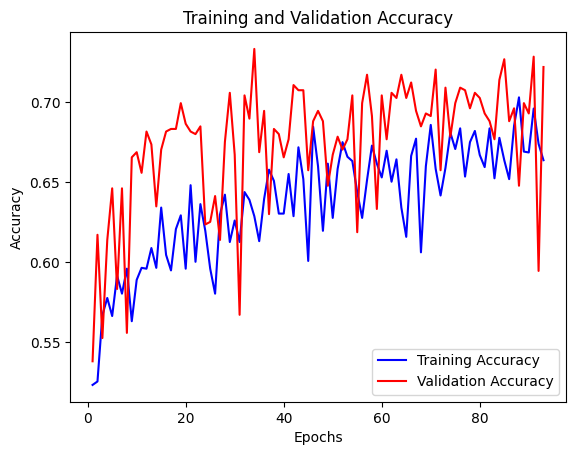

In [ ]:
import matplotlib.pyplot as plt

history = model1.history

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_accuracy = history.history['auc']
val_accuracy = history.history['val_auc']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training auc')
plt.plot(epochs, val_accuracy, 'r', label='Validation auc')
plt.title('Training and Validation auc')
plt.xlabel('Epochs')
plt.ylabel('auc')
plt.legend()
plt.show()


In [ ]:
print("train confusion_matrix")
confusion_matrix_fun(train,model1)

In [ ]:
print("test confusion_matrix")
confusion_matrix_fun(test,model1)

In [ ]:
import cv2
def load_raw_images_df(data_frame,filenamecol,labelcol,img_size,n_classes):
    n_images = len(data_frame)
    X = np.empty((n_images,img_size,img_size,3))
    Y = np.zeros((n_images,n_classes))
    for index,entry in data_frame.iterrows():
        Y[index,entry[labelcol]] = 1
        img = cv2.imread(entry[filenamecol])
        X[index,:] = cv2.resize(img, (img_size, img_size))
        X[index,:] = X[index,:] / 255.0
    return X,Y

### InceptionResNetV2

In [ ]:
tf.keras.backend.clear_session()
InceptionResNetV2= tf.keras.applications.InceptionResNetV2(input_shape=(256,256,3),include_top=False)
for layer in InceptionResNetV2.layers[:-10]:
  layer.trainable = False

flatten = Flatten()(InceptionResNetV2.output)

drop =  Dropout(0.5)(flatten)
dense1 = Dense(512, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=32),kernel_regularizer='l2')(drop)
BN1=tf.keras.layers.BatchNormalization()(dense1)
dense2 = Dense(128, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=32),kernel_regularizer='l2')(BN1)
BN2=tf.keras.layers.BatchNormalization()(dense2)
dense3 = Dense(64, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=32),kernel_regularizer='l2')(BN2)
BN3=tf.keras.layers.BatchNormalization()(dense3)
Output_layer = Dense(units=4,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_uniform(),name='Output')(BN3)

model4 = Model(inputs=InceptionResNetV2.input,outputs=Output_layer)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model4.compile(optimizer=optimizer, loss="categorical_crossentropy",metrics=["accuracy"],run_eagerly=True)

219055592/219055592 [==============================] - 2s 0us/step


In [ ]:
history = model4.fit_generator(training_generator,steps_per_epoch = X_train.shape[0] // 32,epochs = 100,
                         validation_data = (X_val,Y_val),
                         validation_steps = 10,
                         workers = 2,use_multiprocessing=True,
                         class_weight=class_weight_dict)

<ipython-input-25-de20c68b3816>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model4.fit_generator(training_generator,steps_per_epoch = X_train.shape[0] // 32,epochs = 100,


Epoch 1/100
58/58 [==============================] - ETA: 0s - loss: 2.3112 - accuracy: 0.3939

In [ ]:
model4.save_weights('/content/drive/MyDrive/PROJECTS/Deep Learning/Diabetic Retinopathy/NoteBook/final2.h5')

### Sampling Using augmentation

In [ ]:
Severe_list = df[df["class"]=="Severe"]["id_code"].tolist()

In [ ]:
import uuid
import concurrent.futures
from tqdm import tqdm
from PIL import Image
import random
import os

def new_image(l1, batch_size=10):
    augmented_paths = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        batches = [l1[i:i+batch_size] for i in range(0, len(l1), batch_size)]
        for batch in tqdm(batches):
            futures = [executor.submit(augment_image, f"/content/images/{i}", f"/content/images/{uuid.uuid4()}.png") for i in batch]
            for future in concurrent.futures.as_completed(futures):
                augmented_paths.append(future.result())
    return augmented_paths

def augment_image(input_path, output_path):
    img = Image.open(input_path)
    rotation_range = 15
    width_shift_range = 0.1
    rotation_angle = random.uniform(-rotation_range, rotation_range)
    img = img.rotate(rotation_angle, expand=True)
    width_shift = random.uniform(-width_shift_range, width_shift_range) * img.size[0]
    img = img.transform(img.size, Image.AFFINE, (1, 0, width_shift, 0, 1, 0))
    img.save(output_path)
    return output_path

In [ ]:
Severe_list1 = new_image(Severe_list)

100%|██████████| 49/49 [13:07<00:00, 16.06s/it]


In [ ]:
import uuid
import concurrent.futures
from tqdm import tqdm
from PIL import Image
import numpy as np

def add_noise(input_path, output_path, noise_factor=0.05):
    img = Image.open(input_path)
    img = np.array(img)
    noise = np.random.normal(0, 1, img.shape) * noise_factor
    noisy_img = np.clip(img + noise, 0, 255).astype(np.uint8)
    noisy_img = Image.fromarray(noisy_img)
    noisy_img.save(output_path)
    return output_path

def new_image_with_noise(l1, batch_size=10):
    augmented_paths = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        batches = [l1[i:i+batch_size] for i in range(0, len(l1), batch_size)]
        for batch in tqdm(batches):
            futures = [executor.submit(add_noise, f"/content/images/{i}", f"/content/images/{uuid.uuid4()}.png") for i in batch]
            for future in concurrent.futures.as_completed(futures):
                augmented_paths.append(future.result())
    return augmented_paths

In [ ]:
Severe_list2 = new_image_with_noise(Severe_list)

100%|██████████| 49/49 [23:07<00:00, 28.32s/it]


In [ ]:
from PIL import Image
import random
import os

def augment_image(input_path, output_path):
    img = Image.open(input_path)
    rotation_range = 15
    width_shift_range = 0.1
    rotation_angle = random.uniform(-rotation_range, rotation_range)
    img = img.rotate(rotation_angle, expand=True)
    width_shift = random.uniform(-width_shift_range, width_shift_range) * img.size[0]
    img = img.transform(img.size, Image.AFFINE, (1, 0, width_shift, 0, 1, 0))
    img.save(output_path)
    return output_path

In [ ]:
def add_noise(input_path, output_path, noise_factor=0.05):
    img = Image.open(input_path)
    img = np.array(img)
    noise = np.random.normal(0, 1, img.shape) * noise_factor
    noisy_img = np.clip(img + noise, 0, 255).astype(np.uint8)
    noisy_img = Image.fromarray(noisy_img)
    noisy_img.save(output_path)
    return output_path

In [ ]:
import uuid
import concurrent.futures
from tqdm import tqdm

def new_image(l1):
    augmented_paths = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(augment_image, f"/content/images/{i}", f"/content/images/{uuid.uuid4()}.png") for i in tqdm(l1)]
        for future in concurrent.futures.as_completed(futures):
            augmented_paths.append(future.result())
    return augmented_paths

In [ ]:
def new_image_with_noise(l1):
    augmented_paths = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(add_noise, f"/content/images/{i}", f"/content/images/{uuid.uuid4()}.png") for i in tqdm(l1)]
        for future in concurrent.futures.as_completed(futures):
            augmented_paths.append(future.result())
    return augmented_paths

In [ ]:
Severe_list1 = new_image(Severe_list)
Severe_list2 = new_image_with_noise(Severe_list)

100%|██████████| 488/488 [00:00<00:00, 4834.77it/s]


In [ ]:
list1 = Severe_list1 + Severe_list2
list2 = ["Severe"]*(len(Severe_list1)) + ["Severe"]*(len(Severe_list2))

In [ ]:
df_to_append = pd.DataFrame({'id_code': list1, 'class': list2})
train_new = pd.concat([train, df_to_append])

Severe      1329
Moderate    1039
Name: class, dtype: int64


<Axes: >

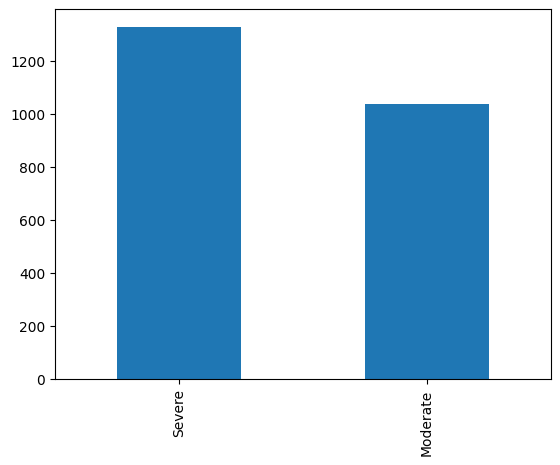

In [ ]:
print(train_new['class'].value_counts())
train_new['class'].value_counts().plot.bar()

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_dataframe(
    train_new,
    "/content/images",
    x_col='id_code',
    y_col='class',
    target_size=(75,75),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 2368 validated image filenames belonging to 2 classes.


#### Model1

In [ ]:
tf.keras.backend.clear_session()

InceptionResNetV2 = tf.keras.applications.InceptionResNetV2(input_shape=(75,75,3), include_top=False)

for layer in InceptionResNetV2.layers[:-10]:
    layer.trainable = False

flatten = Flatten()(InceptionResNetV2.output)

dense1 = Dense(512, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=32))(flatten)
dropout1 = Dropout(0.5)(dense1)

dense2 = Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=32))(dropout1)
dropout2 = Dropout(0.3)(dense2)

dense3 = Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=32))(dropout2)
dropout3 = Dropout(0.2)(dense3)

Output_layer = Dense(units=2, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_uniform(), name='Output')(dropout3)

model7 = Model(inputs=InceptionResNetV2.input, outputs=Output_layer)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model7.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy", "AUC"], run_eagerly=True)


219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
rm -rf ./logs/

In [ ]:
model7.fit(
    train_generator,
    epochs=20,
    batch_size = 64,
    callbacks=callbackList,
    validation_data=validation_generator)

Epoch 1/20


74/74 [==============================] - 574s 8s/step - loss: 0.8274 - accuracy: 0.5992 - auc: 0.6487 - val_loss: 0.5825 - val_accuracy: 0.7247 - val_auc: 0.7819 - lr: 0.0010
Epoch 2/20
74/74 [==============================] - 562s 8s/step - loss: 0.6388 - accuracy: 0.6364 - auc: 0.7088 - val_loss: 0.6750 - val_accuracy: 0.5699 - val_auc: 0.6171 - lr: 0.0010
Epoch 3/20
74/74 [==============================] - ETA: 0s - loss: 0.5803 - accuracy: 0.6913 - auc: 0.7649
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.
74/74 [==============================] - 567s 8s/step - loss: 0.5803 - accuracy: 0.6913 - auc: 0.7649 - val_loss: 0.6414 - val_accuracy: 0.6817 - val_auc: 0.7152 - lr: 0.0010
Epoch 4/20
74/74 [==============================] - 566s 8s/step - loss: 0.5410 - accuracy: 0.6968 - auc: 0.7882 - val_loss: 0.6543 - val_accuracy: 0.6215 - val_auc: 0.6842 - lr: 9.0000e-04
Epoch 5/20
74/74 [==============================] - ETA: 0s - loss: 0.5306 - accuracy: 0.7

In [ ]:
import matplotlib.pyplot as plt

history = model1.history

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_accuracy = history.history['auc']
val_accuracy = history.history['val_auc']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training auc')
plt.plot(epochs, val_accuracy, 'r', label='Validation auc')
plt.title('Training and Validation auc')
plt.xlabel('Epochs')
plt.ylabel('auc')
plt.legend()
plt.show()


In [ ]:
print("train confusion_matrix")
confusion_matrix_fun(train,model7)

In [ ]:
print("test confusion_matrix")
confusion_matrix_fun(test,model7)